In [1]:
import numpy as np
import pathlib
from scipy import sparse
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.linear_model import LogisticRegression

## Load Data
Although it should not matter for linear models, we will use the standardized datasets for Logistic Regression.

In [2]:
datapath = pathlib.Path('.') / 'Data'
data_loader = np.load(datapath / 'PreprocessedData_Scaled_wMask.npz')
X_train = sparse.csr_matrix((data_loader['X_train_data'],
                                   data_loader['X_train_indices'],
                                   data_loader['X_train_indptr']),
                                  shape = data_loader['X_train_shape'])
y_train = data_loader['y_train']
X_test = sparse.csr_matrix((data_loader['X_test_data'],
                                  data_loader['X_test_indices'],
                                  data_loader['X_test_indptr']),
                                 shape = data_loader['X_test_shape'])
y_test = data_loader['y_test']
print(X_train.shape, y_train.shape)

(34696, 1056) (34696,)


## Model

In [3]:
def test_results(y_test, y_pred):
    '''
        Print out various validation results
        takes actual and predicted labels of test set as input
        Prints out the numbers, no return value
    '''
    precision, recall, fscore, train_support = score(y_test,
                                                     y_pred,
                                                     labels = ['Real', 'Fake'],
                                                     average='binary')
    print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.\
          format(round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3),\
                 round((y_pred == y_test).sum()/len(y_pred), 3)))
    
    print('\nClassification Report :\n')
    print(classification_report(y_test, y_pred, target_names = ['Real', 'Fake']))

    print('ROC AUC Score : {}\n'.format(roc_auc_score(y_test, y_pred)))
    
    print('\nConfusion Matrix :\n')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [0, 1],
                                            display_labels = ['Real', 'Fake'], cmap = 'magma')

In [4]:
default_params = LogisticRegression().get_params()
print('Default Parameters of LogisticRegression :\n{}'.format(default_params))

Default Parameters of LogisticRegression :
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/home/kb/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fit time: 4.757 / Predict time: 0.008 ---- Precision: 0.919 / Recall: 0.934 / Accuracy: 0.929

Classification Report :

              precision    recall  f1-score   support

        Real       0.94      0.92      0.93      3187
        Fake       0.92      0.93      0.93      2936

    accuracy                           0.93      6123
   macro avg       0.93      0.93      0.93      6123
weighted avg       0.93      0.93      0.93      6123

ROC AUC Score : 0.9289817006076285


Confusion Matrix :



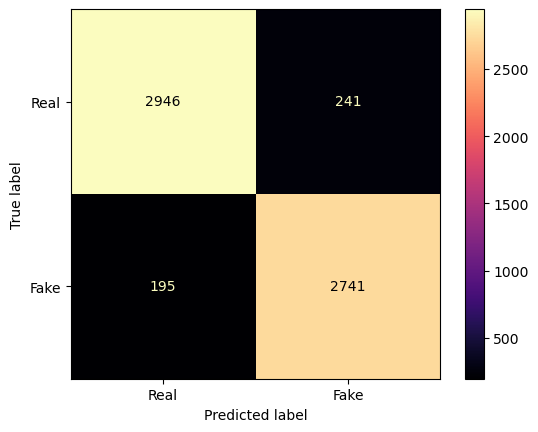

In [5]:
logreg = LogisticRegression(random_state = 76)

start = time.time()
logreg_model = logreg.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = logreg_model.predict(X_test)
end = time.time()
pred_time = (end - start)

test_results(y_test, y_pred)

In [6]:
new_params = logreg_model.get_params()
del new_params['random_state'], default_params['random_state']
# since we are manually setting random_state, removing that from comparison
if (default_params == new_params):
    print('No change observed in the Default Logistic Regression',\
                                    'parameters after fitting the data.')
else:
    print('Default Logistic Regression changed following parameters after fitting :')
    for key, value in default_params.items():
        if(value != new_params[key]):
            print('{} : {}'.format(key, new_params[key]))

No change observed in the Default Logistic Regression parameters after fitting the data.


Fit time: 171.578 / Predict time: 0.021 ---- Precision: 0.92 / Recall: 0.933 / Accuracy: 0.929

Classification Report :

              precision    recall  f1-score   support

        Real       0.94      0.93      0.93      3187
        Fake       0.92      0.93      0.93      2936

    accuracy                           0.93      6123
   macro avg       0.93      0.93      0.93      6123
weighted avg       0.93      0.93      0.93      6123

ROC AUC Score : 0.928954875862346


Confusion Matrix :



/home/kb/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


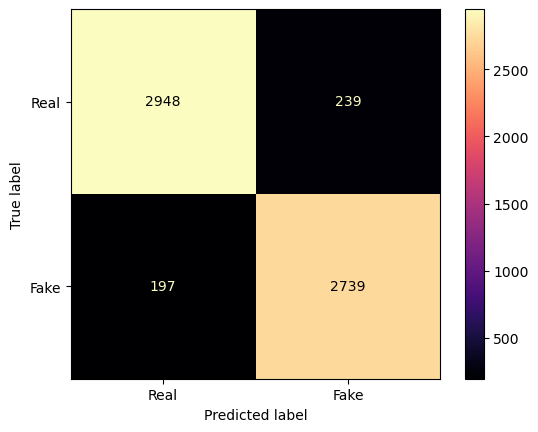

In [7]:
logreg = LogisticRegression(solver = 'saga',
                                 penalty = 'elasticnet',
                                 C = 15,
                                 l1_ratio = 0,
                                 max_iter = 1000,
                                 random_state = 76)

start = time.time()
logreg_model = logreg.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = logreg_model.predict(X_test)
end = time.time()
pred_time = (end - start)

test_results(y_test, y_pred)